In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
plt.style.use("fivethirtyeight")

In [ ]:
data=pd.read_csv(r'C:\Users\Chhaya\OneDrive\Desktop\PythonAssignments\KNNProject\2 Project\Market Positioning of Mobile\Dataset\Dataset\Mobile_data.csv')

In [ ]:
data.head(5)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0


In [ ]:
data.dtypes


battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

In [ ]:
data.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

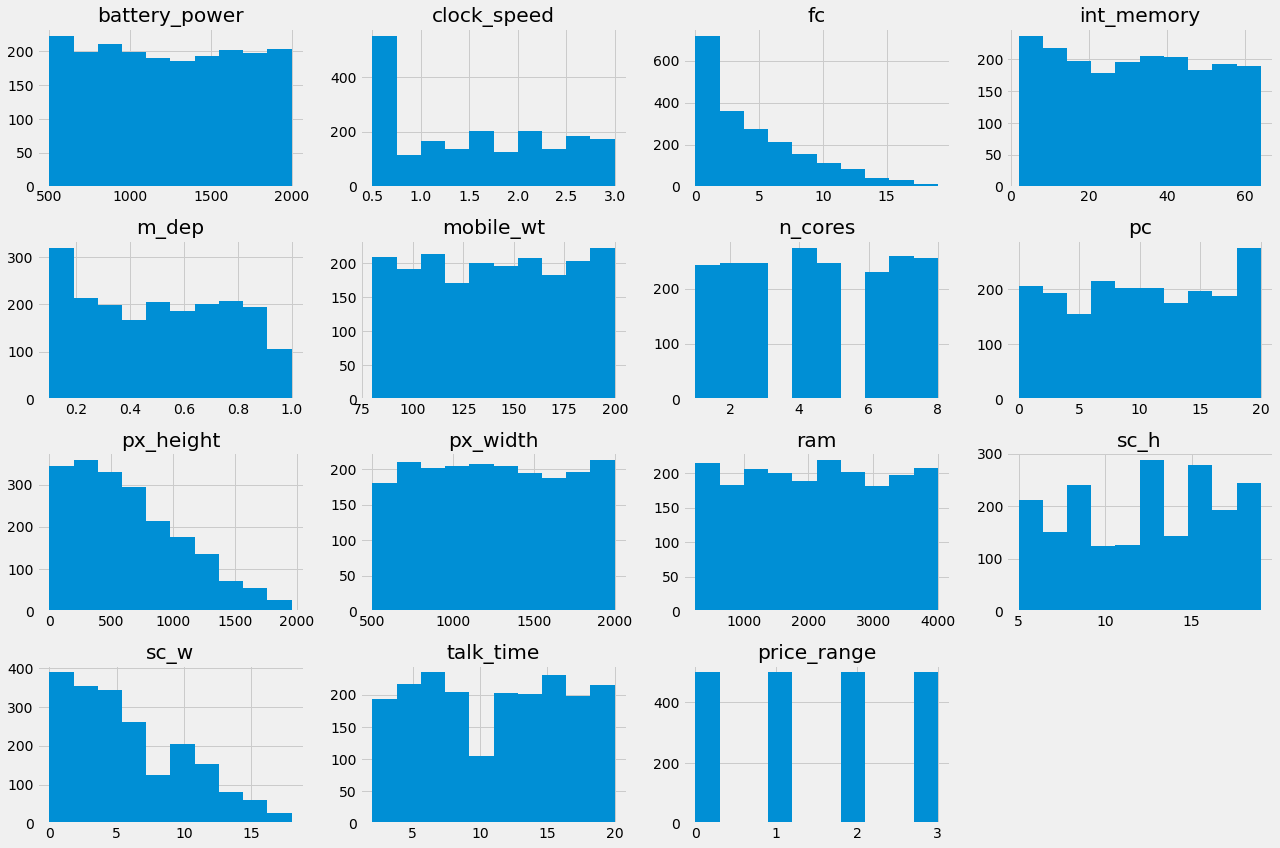

In [ ]:
#EDA
plt.rcParams['figure.figsize']=[18,12]
data.hist()
plt.tight_layout()
plt.show()

In [ ]:
clss_freq=data['price_range'].value_counts()

<AxesSubplot:xlabel='price_range', ylabel='count'>

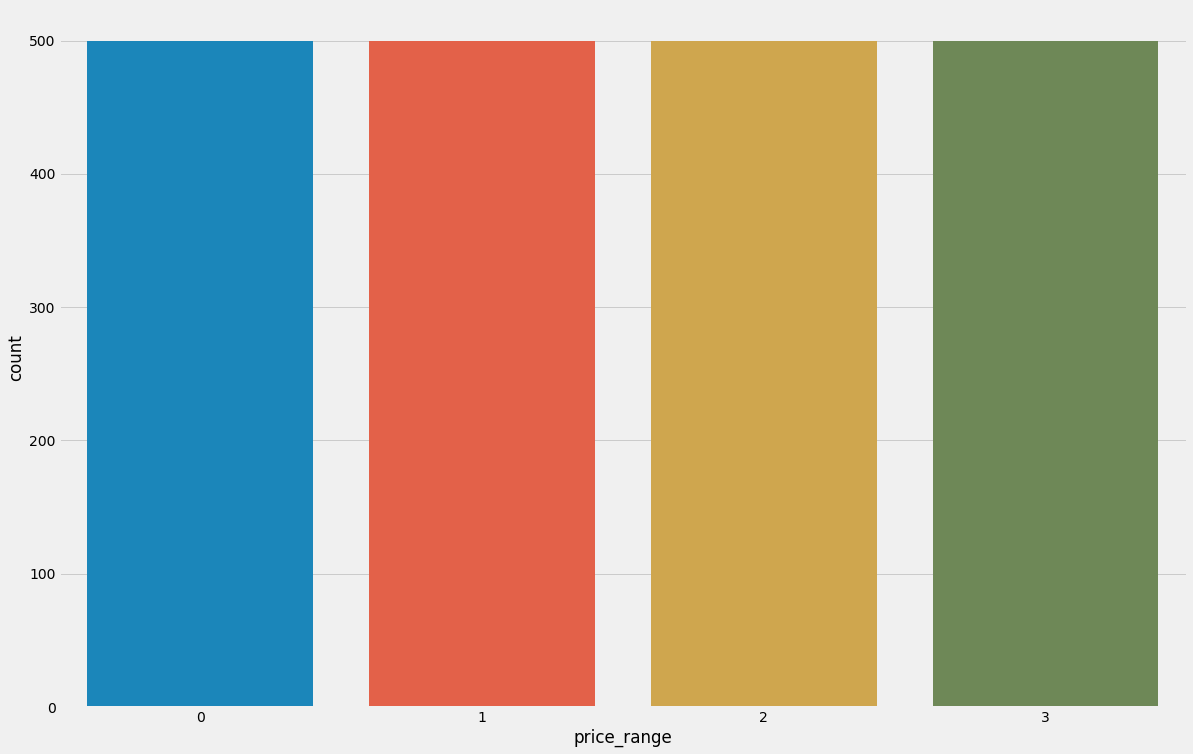

In [ ]:
sns.countplot(x=data['price_range'])

In [ ]:
price_group=data.groupby('price_range')

In [ ]:
price_group['ram'].mean()

price_range
0     785.314
1    1679.490
2    2582.816
3    3449.232
Name: ram, dtype: float64

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='ram'>

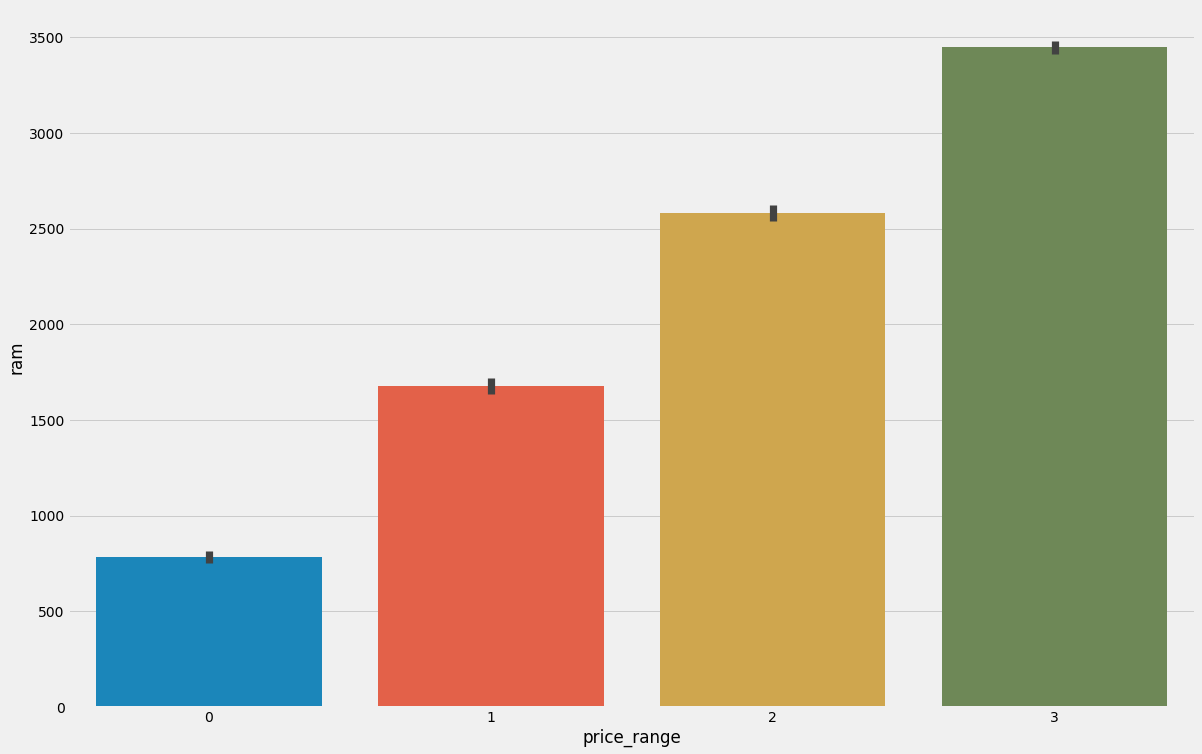

In [ ]:
sns.barplot('price_range','ram',data=data)

In [ ]:
#correlation
corr=data.corr()
corr

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.200723
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.006606
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.021998
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,0.044435
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,0.000853
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,-0.030302
n_cores,-0.029727,-0.005724,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,0.004399
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,0.033599
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645,0.148858
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720,0.165818


<AxesSubplot:>

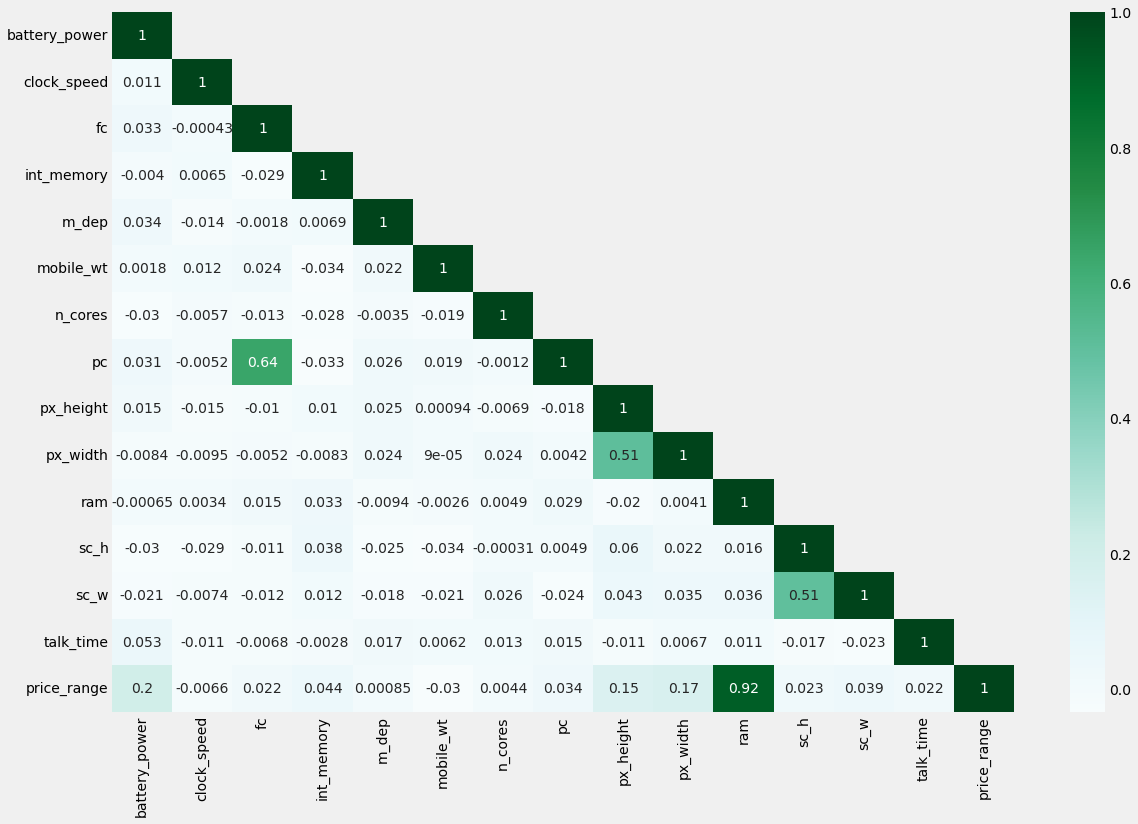

In [ ]:
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask,k=1)]=True


sns.heatmap(corr,annot=True,mask=mask,cmap='BuGn')

In [ ]:
data_feat=data.drop('price_range',axis=1)
data_tar=data['price_range']

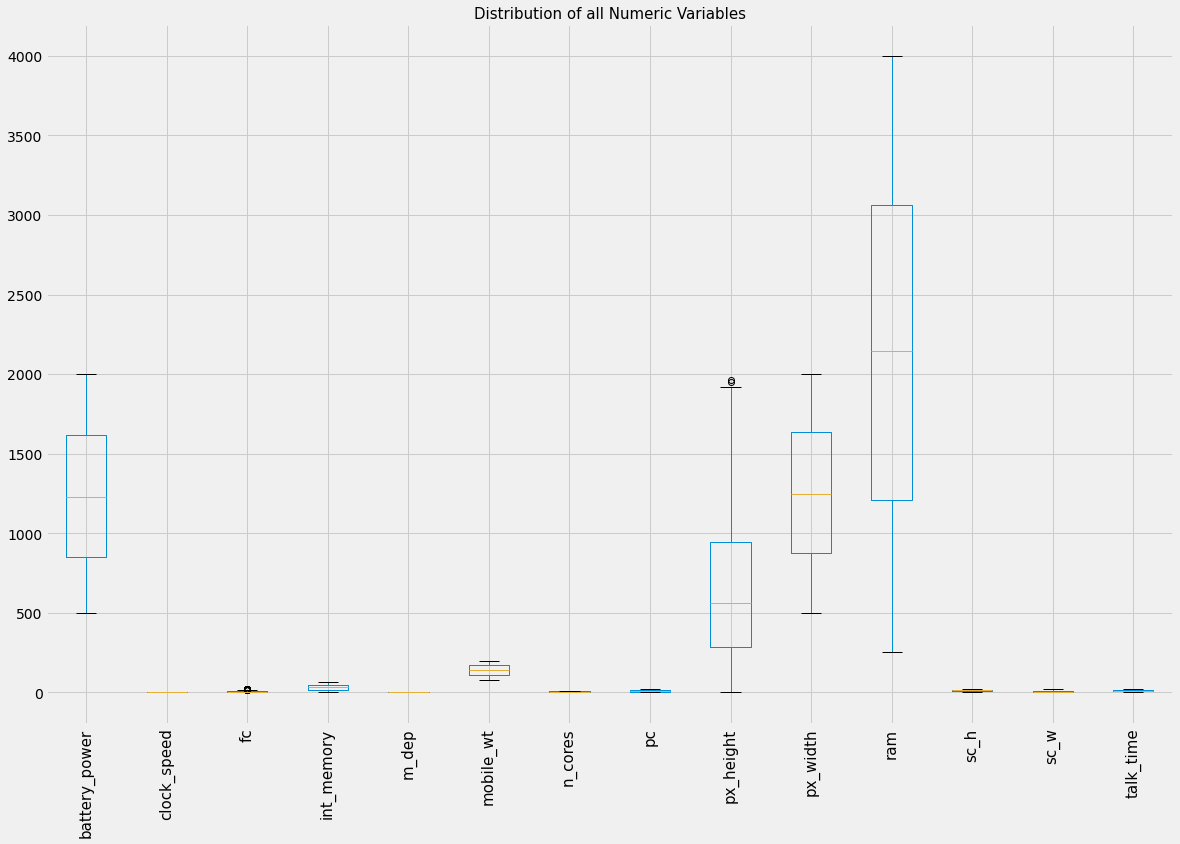

In [ ]:
data_feat.boxplot()
plt.title('Distribution of all Numeric Variables', fontsize=15)
plt.xticks(rotation='vertical',fontsize=15);

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


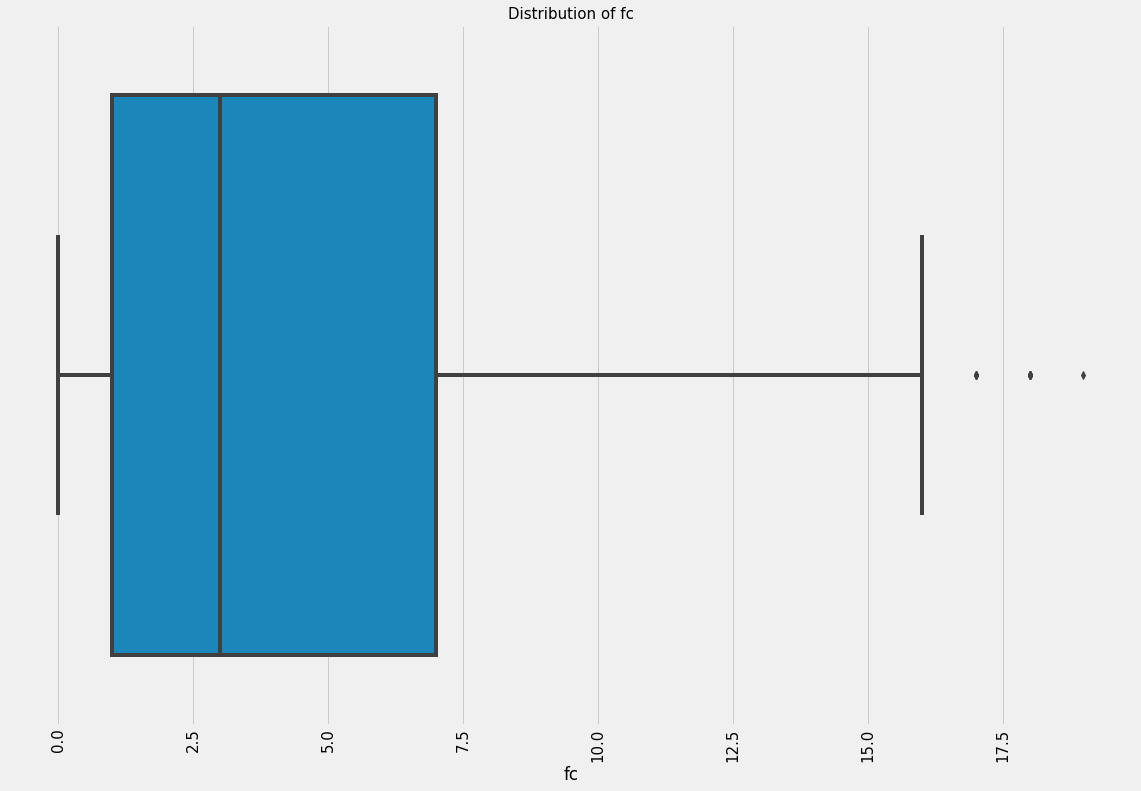

In [ ]:
sns.boxplot(data_feat['fc'])
plt.title('Distribution of fc',fontsize=15)
plt.xticks(rotation='vertical',fontsize=15);

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


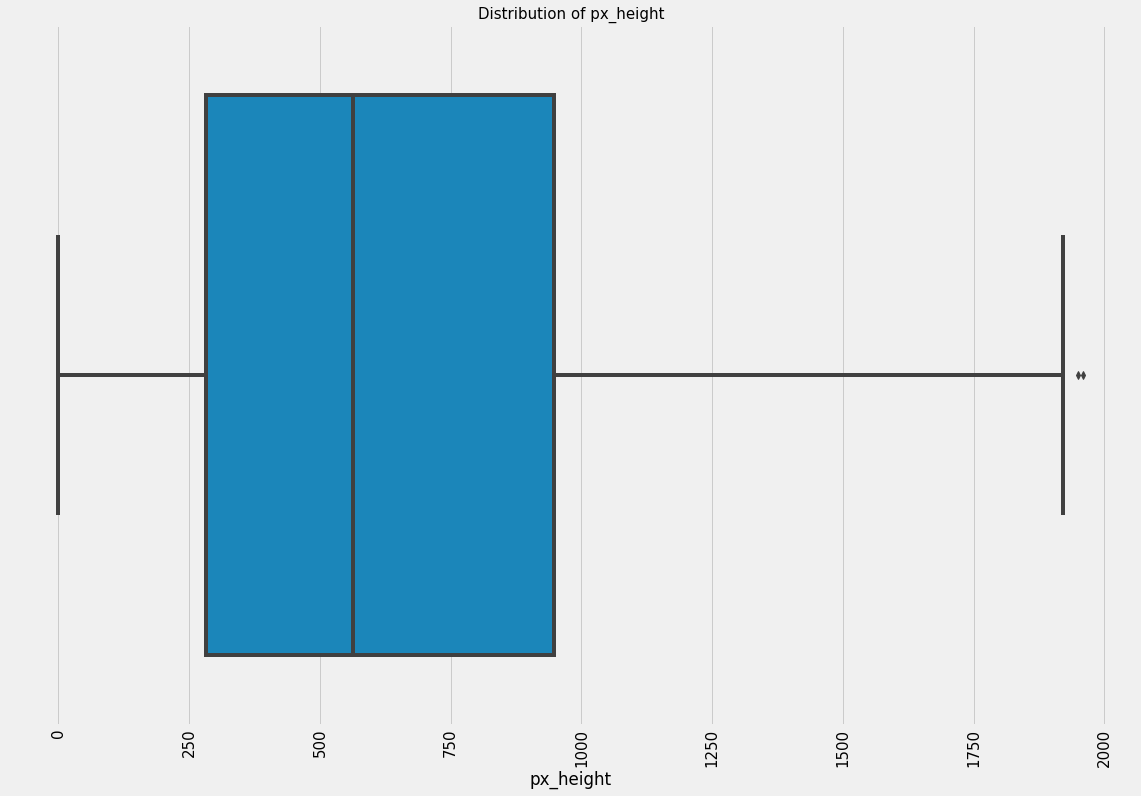

In [ ]:
sns.boxplot(data_feat['px_height'])
plt.title('Distribution of px_height',fontsize=15)
plt.xticks(rotation='vertical',fontsize=15);

In [ ]:
Q1=data_feat.quantile(0.25)
Q3=data_feat.quantile(0.75)
IQR=Q3-Q1
print(IQR)

battery_power     763.50
clock_speed         1.50
fc                  6.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
dtype: float64


In [ ]:
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
data=data.reset_index(drop=True)

C:\Users\Chhaya\AppData\Local\Temp\ipykernel_8116\1508455531.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]


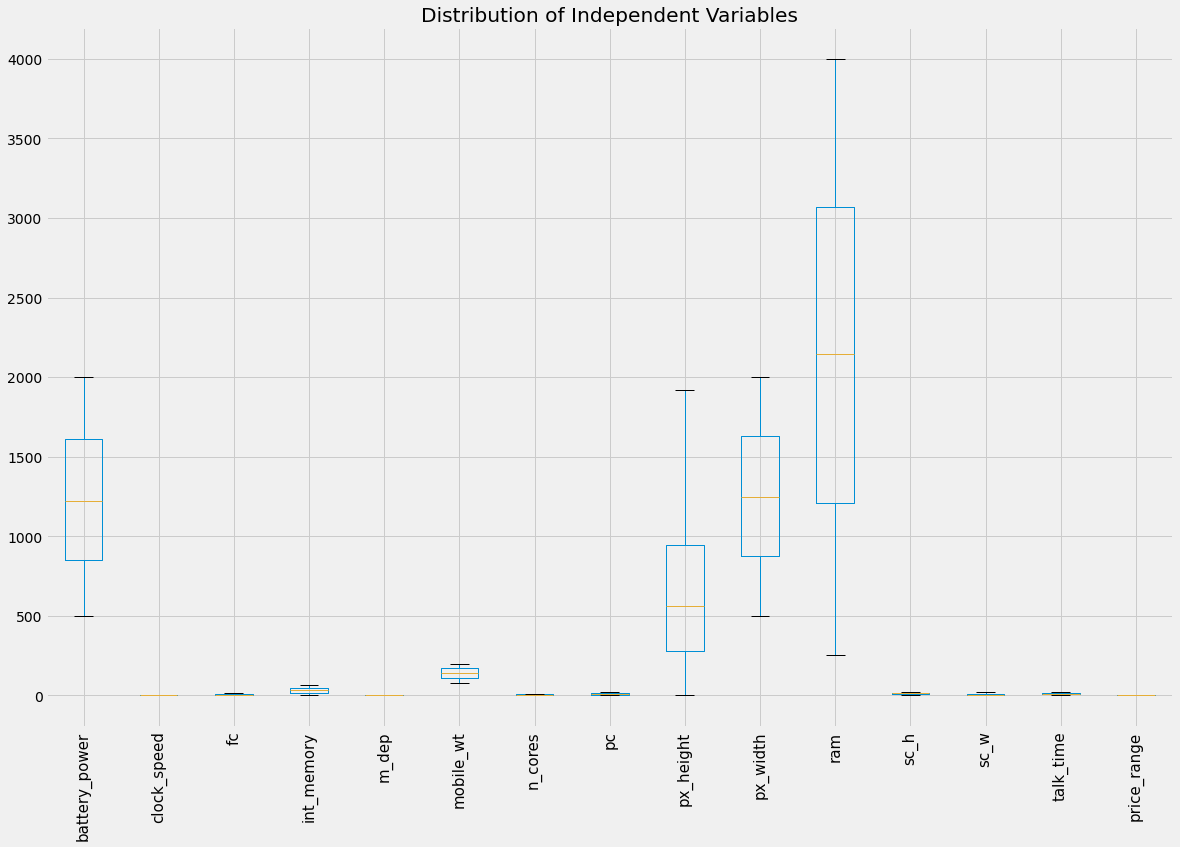

In [ ]:
data.boxplot()
plt.title('Distribution of Independent Variables')

plt.xticks(rotation='vertical',fontsize=15);

In [ ]:
data.shape

(1980, 15)

In [ ]:
X=data.drop('price_range',axis=1)
Y=data['price_range']

In [ ]:
data_num=data.apply(lambda rec:(rec-rec.mean())/rec.std())
data_num.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,-0.897248,0.830652,-0.765253,-1.382209,0.338657,1.351754,-1.103004,-1.300985,-1.411916,-1.143741,0.390818,-0.787936,0.281378,1.465078,-0.445475
1,-0.490030,-1.249531,-1.005152,1.155467,0.685011,-0.117795,-0.666564,-0.636909,0.599639,1.710709,0.466425,1.112614,-0.636461,-0.733510,0.449089
2,-1.531961,-1.249531,-0.525354,0.493465,1.377719,0.136550,0.206317,-0.636909,1.413354,1.080506,0.440608,-0.312799,-0.865920,-0.367079,0.449089
3,-1.413663,1.197743,-1.005152,-1.216708,1.031365,-0.259098,0.642758,-0.138852,1.306525,1.242690,0.593666,0.875045,0.510837,-0.000648,0.449089
4,1.329935,-0.392985,2.113534,0.658966,0.338657,0.023508,-1.103004,0.691243,1.288342,-0.087224,-0.658459,-1.025505,-0.865920,0.732215,-0.445475


In [ ]:
def get_test_report(model):
    test_pred=model.predict(x_test)
    return(classification_report(y_test,test_pred))

In [ ]:
def plot_conf_matrix(model):
    y_pred=model.predict(x_test)
    cm=confusion_matrix(y_test,y_pred)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3'],\
                            index=['Actual:0','Actual:1','Actual:2','Actual:3'])
    sns.heatmap(conf_matrix,annot=True,fmt='d',cmap=ListedColormap(['lightskyblue']),cbar=False,linewidth=0.1,
                annot_kws={'size':25})
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

# KNN

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=10)
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (1386, 14)
x_test (594, 14)
y_train (1386,)
y_test (594,)


In [ ]:
knn_classification=KNeighborsClassifier(n_neighbors=3)
knn_model=knn_classification.fit(x_train,y_train)

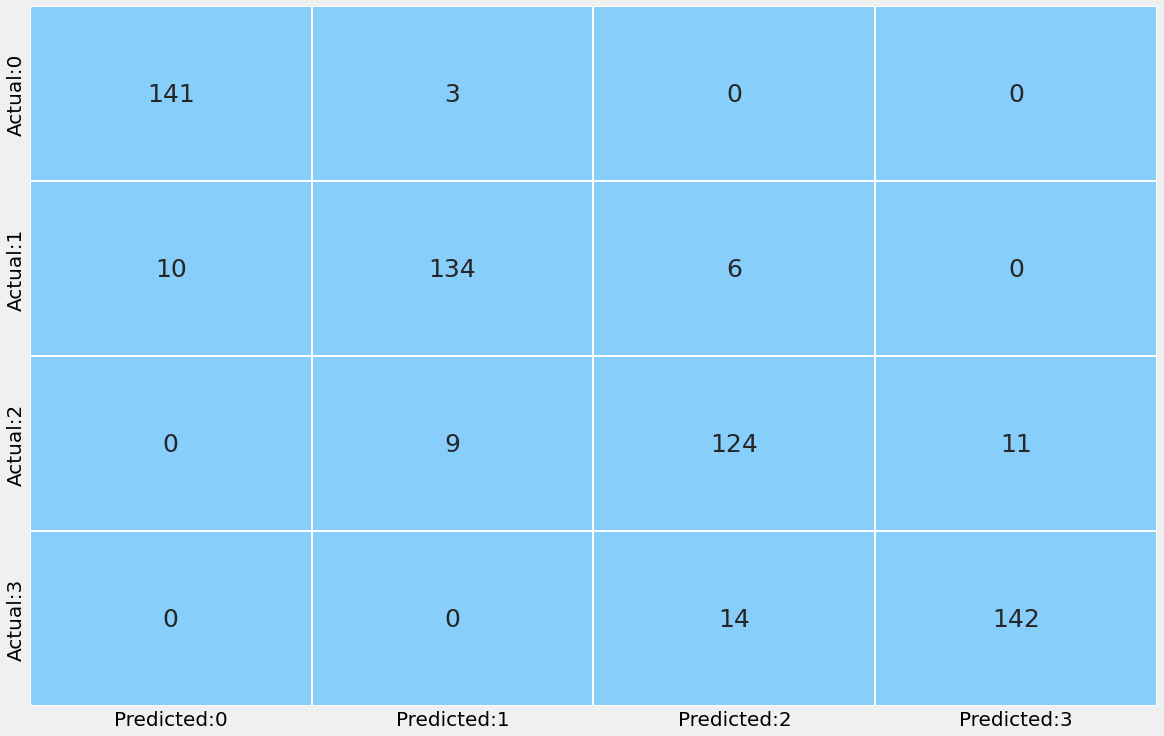

In [ ]:
plot_conf_matrix(knn_model)

In [ ]:
test_report=get_test_report(knn_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       144
           1       0.92      0.89      0.91       150
           2       0.86      0.86      0.86       144
           3       0.93      0.91      0.92       156

    accuracy                           0.91       594
   macro avg       0.91      0.91      0.91       594
weighted avg       0.91      0.91      0.91       594



# Optimal Values of K

In [ ]:
tuned_params={'n_neighbors':np.arange(1,25,2),
             'metric':['hamming','euclidean','manhattan','Chebyshev']}
knn_calssification=KNeighborsClassifier()
knn_grid=GridSearchCV(estimator=knn_classification,
                     param_grid=tuned_params,
                     cv=5,
                     scoring='accuracy')
knn_grid.fit(x_train,y_train)
print('Best parameters for KNN Classifier:',knn_grid.best_params_,'\n')

Best parameters for KNN Classifier: {'metric': 'euclidean', 'n_neighbors': 15} 



C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 200, in fit
    return self._fit(X, y)
  File "C:\Python310\lib\site-packages\sklearn\neighbors\_base.py", line 446, in _fit
    self._check_algorithm_metric()
  File "C:\Python310\lib\site-packages\sklearn\neighbors\_base.py", line 381, in _check_al

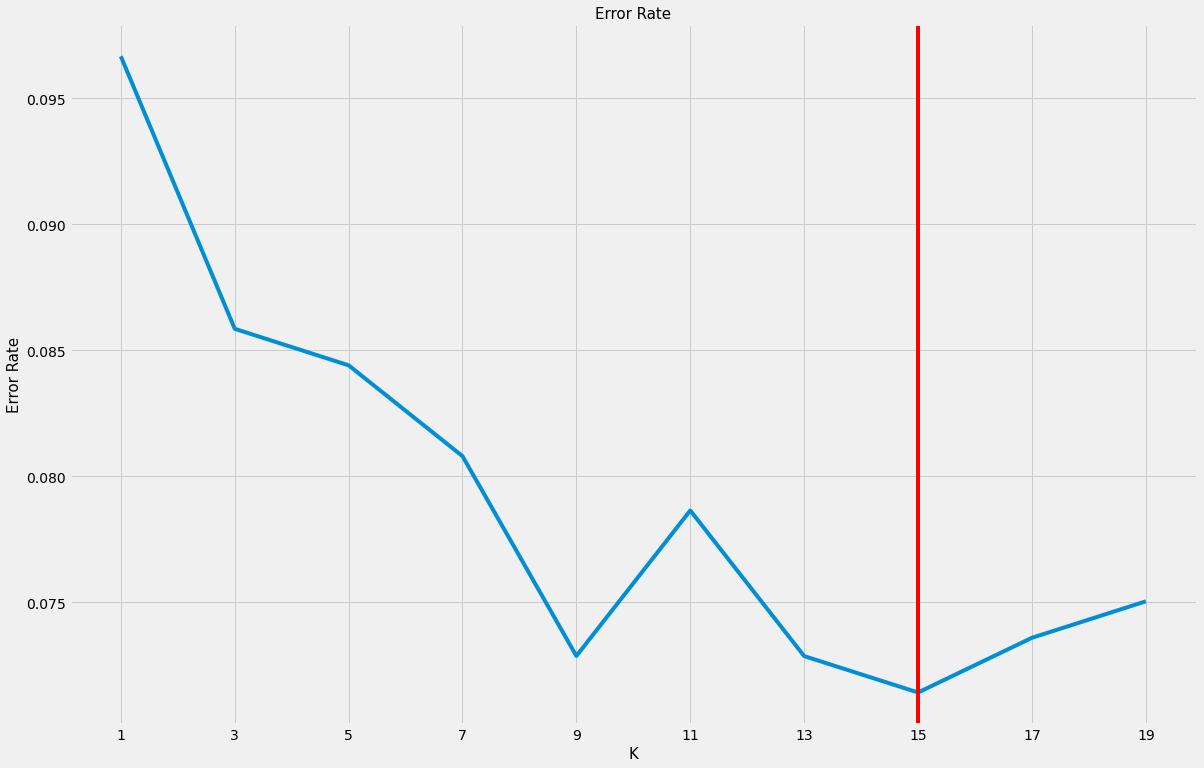

In [ ]:
error_rate=[]
for i in np.arange(1,20,2):
    knn=KNeighborsClassifier(i,metric='euclidean')
    score=cross_val_score(knn,x_train,y_train,cv=5)
    score=score.mean()
    error_rate.append(1-score)
plt.plot(range(1,20,2),error_rate)

plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)
plt.xticks(np.arange(1, 20, step = 2))
plt.axvline(x = 15, color = 'red')

In [ ]:
print('Classification Report for test set: \n', get_test_report(knn_grid))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       144
           1       0.92      0.91      0.91       150
           2       0.91      0.90      0.91       144
           3       0.97      0.95      0.96       156

    accuracy                           0.94       594
   macro avg       0.94      0.94      0.94       594
weighted avg       0.94      0.94      0.94       594



In [ ]:
y_pred=knn_model.predict(x_test)

In [ ]:
kappa=cohen_kappa_score(y_test,y_pred)

In [ ]:
print(kappa)

0.8810150120186857


In [ ]:
y_pred = knn_grid.predict(x_test)

In [ ]:
kappa=cohen_kappa_score(y_test,y_pred)

In [ ]:
print(kappa)

0.9146900086171709


# Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier

gnb=GaussianNB()

GNB=OneVsRestClassifier(gnb)

GNB.fit(x_train,y_train)

OneVsRestClassifier(estimator=GaussianNB())

In [ ]:
y_pred_GNB=GNB.predict(x_test)

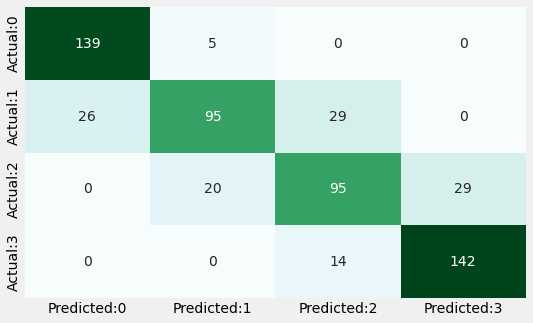

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_GNB)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1','Predicted:2','Predicted:3'],\
                            index=['Actual:0','Actual:1','Actual:2','Actual:3'])
plt.figure(figsize=(8,5))

sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='BuGn',cbar=False)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
result=classification_report(y_test,y_pred_GNB)
print(result)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       144
           1       0.79      0.63      0.70       150
           2       0.69      0.66      0.67       144
           3       0.83      0.91      0.87       156

    accuracy                           0.79       594
   macro avg       0.79      0.79      0.79       594
weighted avg       0.79      0.79      0.79       594

